<a href="https://colab.research.google.com/github/tylerana/tylerana.github.io/blob/main/Cuetessa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Valence in music, describes how positive a song is. 
<br>
**Terminology:**
1. **Frequency(Hz):** describes the differences of wave lengths (high/low pitches)
2. **Intensity(db/power):** The amplitude (height) of the wave. 
3. **Sample Rate:** Specific to how the computer reads in the audio file. It is the "resolution" of the audio.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
import pandas as pd
import datetime
import numpy as np
from glob import glob
import librosa
import librosa.display
import IPython.display as ipd
import soundfile as sf
from matplotlib import pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

Audio Analysis of a single file

In [4]:
# %cd "/content/drive/MyDrive/DEAM_audio/MEMD_audio"
pathAudio = "/content/drive/MyDrive/DEAM_audio/MEMD_audio"
files = librosa.util.find_files(pathAudio, ext=['mp3'])
files = np.asarray(files)
ipd.Audio(files[0])

In [10]:
y, sample_rate = librosa.load(files[0])
# y is the raw data of the audio file
print('y:',y)
# sr is the integer value of the sample rate.
print('sample rate:', sample_rate)

y: [ 0.          0.          0.         ... -0.02295786 -0.0393608
 -0.05048249]
sample rate: 22050


Plot visualizing the first five seconds of a song.

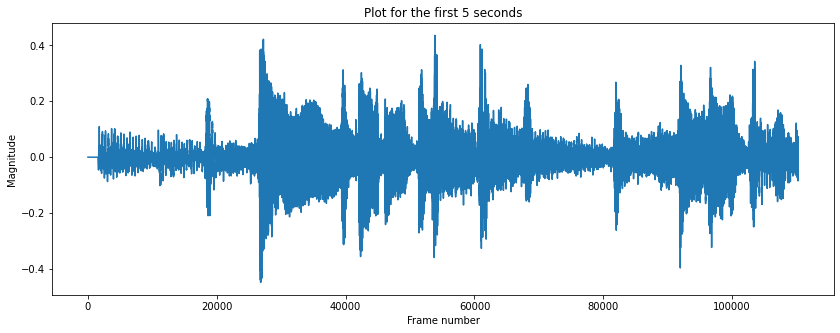

In [11]:
plt.figure(figsize=(14, 5))
plt.plot(y[:sample_rate * 5])
plt.title('Plot for the first 5 seconds')
plt.xlabel('Frame number')
plt.ylabel('Magnitude')
plt.show()